In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file exported from Google Forms
path = rf'Data/Encuesta de alfabetización estadística.csv'
df = pd.read_csv(path)


In [4]:
df_health = df[df['¿Sos estudiante o profesional de las Ciencias Médicas?']=='Si']
df_health.columns

Index(['Timestamp', 'Total score', '¿Cuál es tu edad?',
       '¿Cuál es tu edad? [Score]', '¿Cuál es tu edad? [Feedback]',
       '¿Sos estudiante o profesional de las Ciencias Médicas?',
       '¿Sos estudiante o profesional de las Ciencias Médicas? [Score]',
       '¿Sos estudiante o profesional de las Ciencias Médicas? [Feedback]',
       '¿Cuál es su nivel de educación académica?',
       '¿Cuál es su nivel de educación académica? [Score]',
       '¿Cuál es su nivel de educación académica? [Feedback]',
       '¿Cuántos años de experiencia tenés trabajando en el campo de las Ciencias Médicas?',
       '¿Cuántos años de experiencia tenés trabajando en el campo de las Ciencias Médicas? [Score]',
       '¿Cuántos años de experiencia tenés trabajando en el campo de las Ciencias Médicas? [Feedback]',
       '¿Cursaste una materia de Estadística en tu formación de grado?',
       '¿Cursaste una materia de Estadística en tu formación de grado? [Score]',
       '¿Cursaste una materia de Es

In [5]:
useful_columns = ['Timestamp', 'Total score', '¿Cuál es tu edad?',
       '¿Sos estudiante o profesional de las Ciencias Médicas?',
       '¿Cuál es su nivel de educación académica?',
       '¿Cuántos años de experiencia tenés trabajando en el campo de las Ciencias Médicas?',
       '¿Cursaste una materia de Estadística en tu formación de grado?',
       '¿Hiciste un curso de Estadística por fuera de tu formación de grado?',
       '¿Hiciste un curso o tuviste una materia de Metodología de la investigación? ¿Sentís que te sirvió para entender algunas cosas de Estadística?',
       'Con respecto a tu propia capacidad de interpretación  para analizar papers cientificos con contenido estadístico, ¿Qué tanta confianza te tenés?',
       '¿Cuál es la diferencia entre media, mediana y moda?\nRecordando que: \n-El promedio es la suma de todos los valores dividido el numero de valores. Por ejemplo el promedio del conjunto {1,5 ; 1,4 ; 2,1} es (1,5+1,4+2,1)/3 = 1,66\n-El valor central es el valor "del medio", por ejemplo 1,5 en el conjunto anterior.',
       'Un estudio presenta un nuevo tratamiento. El estudio supone como hipótesis nula que el tratamiento no produce mejoras significativas en los pacientes. Se informa un p-valor de 0.03 y se considera una significancia de 0.05. ¿Qué indica esto?',
       'Si un estudio encuentra una fuerte correlación entre dos variables, ¿Podemos concluir que una causa la otra?',
       'Si un estudio encuentra un resultado estadísticamente significativo, ¿qué implica esto?',
       'En un ensayo clínico, la diferencia en los efectos del tratamiento entre dos grupos no fue estadísticamente significativa. ¿Qué se puede concluir?',
       'Supongamos que la presencia de un virus en una población es del 1% y que se ha desarrollado un test que tiene el 95% de eficacia en detectar ese virus en una persona. Supongamos que este 95% aplica tanto para personas sanas como infectadas, por lo que de cada 100 personas infectadas, se espera que el test detecte correctamente 95  y de 5 falsos negativos, y de cada 100 personas sanas, se espera que detecte a 95 y de 5 falsos positivos.\n\nSi una persona da positivo y no sabemos nada más de ella ¿Cuál es la probabilidad de que esté realmente infectada?',
       'Un estudio afirma en su abstract que un cierto tratamiento reduce el riesgo relativo de padecer una enfermedad en un 50% . Leyéndolo en detalle, vemos que la reducción absoluta de riesgo es del 1%. ¿Como interpretarías esto?',
       'Se estudia un tratamiento para bajar la  presión arterial sistólica. Se informa el intervalo (2, 10) como la diferencia media de presión con respecto a la ausencia de tratamiento, con un 95% de confianza.\n¿Qué significa esto en el contexto de la investigación médica?',
       'Después de leer estas preguntas ¿Cambió tu percepción con respecto de tu propia capacidad para leer papers con contenido estadístico?\n\nPor favor recordá está pregunta al ver las respuestas correctas después de terminar la encuesta.'
]
df = df[useful_columns]


In [6]:
questions = ['Con respecto a tu propia capacidad de interpretación  para analizar papers cientificos con contenido estadístico, ¿Qué tanta confianza te tenés?',
       '¿Cuál es la diferencia entre media, mediana y moda?\nRecordando que: \n-El promedio es la suma de todos los valores dividido el numero de valores. Por ejemplo el promedio del conjunto {1,5 ; 1,4 ; 2,1} es (1,5+1,4+2,1)/3 = 1,66\n-El valor central es el valor "del medio", por ejemplo 1,5 en el conjunto anterior.',
       'Un estudio presenta un nuevo tratamiento. El estudio supone como hipótesis nula que el tratamiento no produce mejoras significativas en los pacientes. Se informa un p-valor de 0.03 y se considera una significancia de 0.05. ¿Qué indica esto?',
       'Si un estudio encuentra una fuerte correlación entre dos variables, ¿Podemos concluir que una causa la otra?',
       'Si un estudio encuentra un resultado estadísticamente significativo, ¿qué implica esto?',
       'En un ensayo clínico, la diferencia en los efectos del tratamiento entre dos grupos no fue estadísticamente significativa. ¿Qué se puede concluir?',
       'Supongamos que la presencia de un virus en una población es del 1% y que se ha desarrollado un test que tiene el 95% de eficacia en detectar ese virus en una persona. Supongamos que este 95% aplica tanto para personas sanas como infectadas, por lo que de cada 100 personas infectadas, se espera que el test detecte correctamente 95  y de 5 falsos negativos, y de cada 100 personas sanas, se espera que detecte a 95 y de 5 falsos positivos.\n\nSi una persona da positivo y no sabemos nada más de ella ¿Cuál es la probabilidad de que esté realmente infectada?',
       'Un estudio afirma en su abstract que un cierto tratamiento reduce el riesgo relativo de padecer una enfermedad en un 50% . Leyéndolo en detalle, vemos que la reducción absoluta de riesgo es del 1%. ¿Como interpretarías esto?',
       'Se estudia un tratamiento para bajar la  presión arterial sistólica. Se informa el intervalo (2, 10) como la diferencia media de presión con respecto a la ausencia de tratamiento, con un 95% de confianza.\n¿Qué significa esto en el contexto de la investigación médica?',
       'Después de leer estas preguntas ¿Cambió tu percepción con respecto de tu propia capacidad para leer papers con contenido estadístico?\n\nPor favor recordá está pregunta al ver las respuestas correctas después de terminar la encuesta.'
]

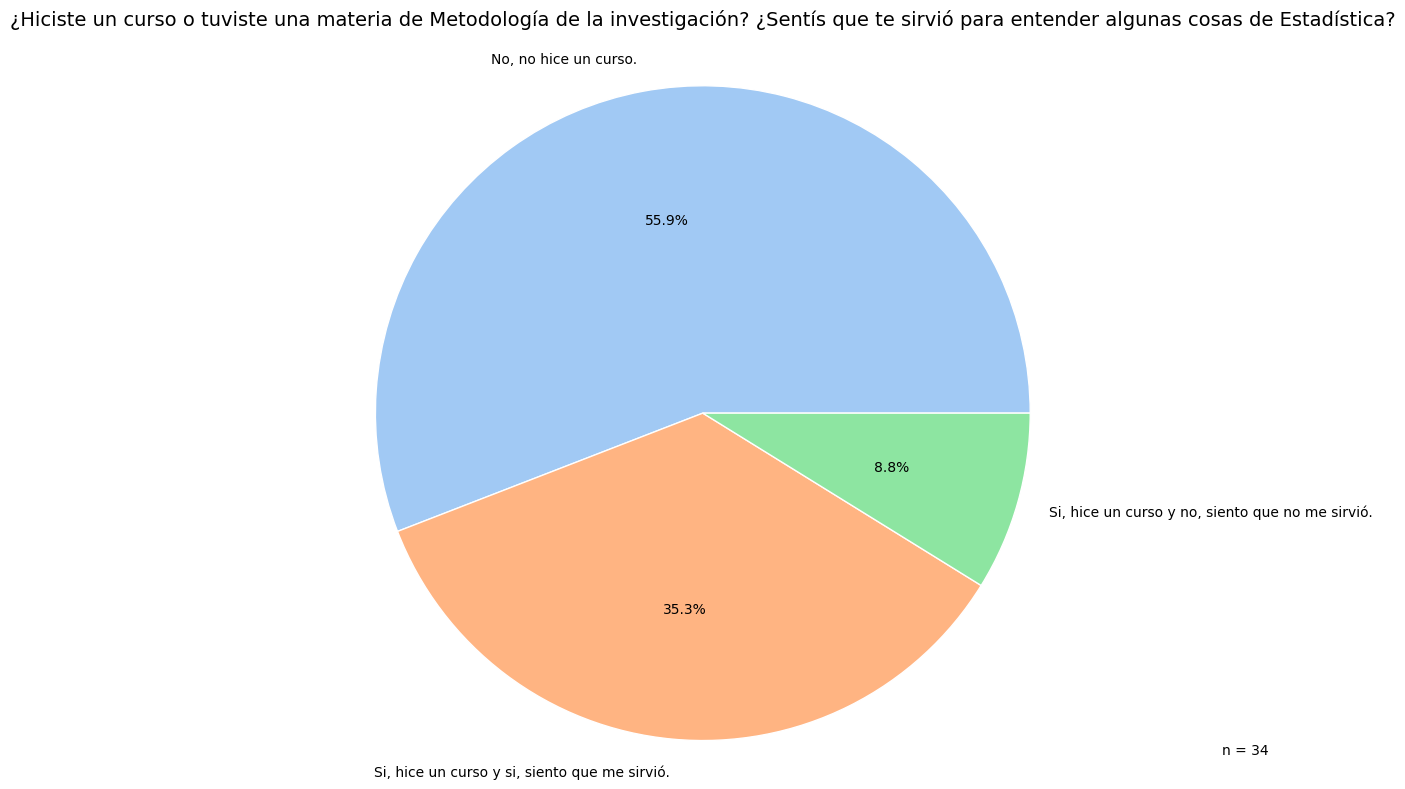


Estadísticas del análisis:
Total de respuestas: 70
Respuestas del área de salud: 34
Porcentaje de respuestas del área de salud: 48.6%


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo visual
#plt.style.use('seaborn')
colors = sns.color_palette('pastel')



# Filtrar solo estudiantes y profesionales de la salud
# Ajusta el nombre de la columna y los valores según tu formulario
medical_responses = df_health

def create_pie_chart(data, column_name, title):
    plt.figure(figsize=(10, 8))
    
    # Calcular los valores y porcentajes
    value_counts = data[column_name].value_counts()
    
    # Crear el gráfico de torta
    plt.pie(value_counts, 
            labels=value_counts.index,
            autopct='%1.1f%%',
            colors=colors,
            wedgeprops={'edgecolor': 'white'})
    
    plt.title(title, pad=20, size=14)
    plt.axis('equal')  # Para asegurar que el círculo sea redondo
    
    # Agregar estadísticas básicas como texto
    plt.figtext(0.95, 0.05, 
                f'n = {len(data)}',
                horizontalalignment='right')
    
    plt.tight_layout()
    plt.show()

# Lista de preguntas a analizar
# Reemplaza estos nombres con los nombres reales de tus columnas
preguntas = {
'¿Hiciste un curso o tuviste una materia de Metodología de la investigación? ¿Sentís que te sirvió para entender algunas cosas de Estadística?':'¿Hiciste un curso o tuviste una materia de Metodología de la investigación? ¿Sentís que te sirvió para entender algunas cosas de Estadística?',
    # Agrega más preguntas según necesites
    
}

# Crear un gráfico para cada pregunta
for columna, titulo in preguntas.items():
    create_pie_chart(medical_responses, columna, titulo)

# Estadísticas básicas
print("\nEstadísticas del análisis:")
print(f"Total de respuestas: {len(df)}")
print(f"Respuestas del área de salud: {len(medical_responses)}")
print(f"Porcentaje de respuestas del área de salud: {(len(medical_responses)/len(df))*100:.1f}%")

# Guardar los datos filtrados en un nuevo CSV
medical_responses.to_csv('respuestas_filtradas.csv', index=False)

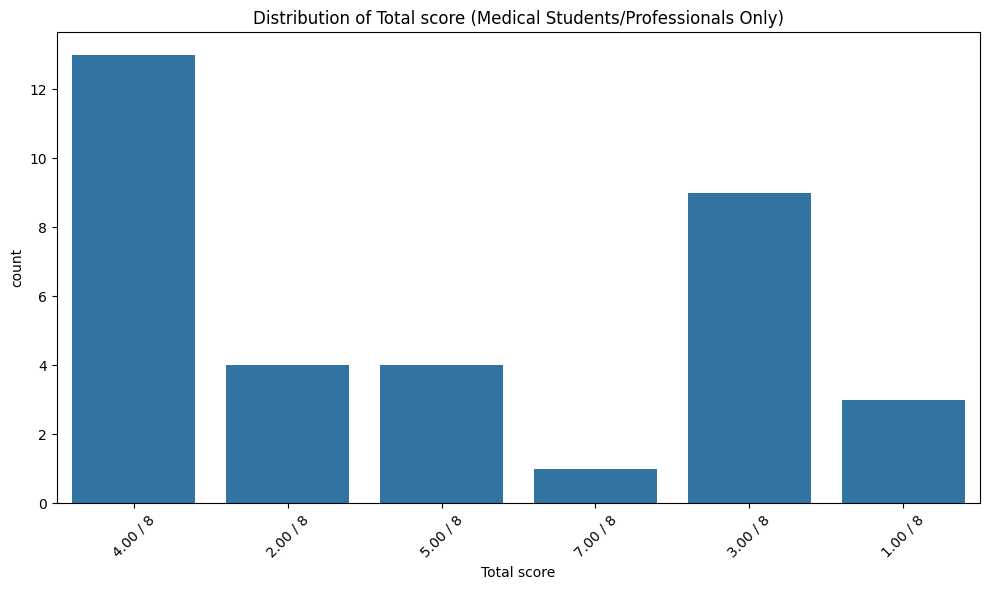


Basic Statistics:
Total responses: 70
Medical/Health responses: 34
Percentage of medical/health responses: 48.6%


In [8]:

# Function to create visualizations
def create_visualization(data, column_name, plot_type='bar'):
    plt.figure(figsize=(10, 6))
    
    if plot_type == 'bar':
        sns.countplot(data=data, x=column_name)
    elif plot_type == 'pie':
        data[column_name].value_counts().plot(kind='pie', autopct='%1.1f%%')
    
    plt.title(f'Distribution of {column_name} (Medical Students/Professionals Only)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Create visualizations for each question
# Replace 'question1', 'question2', etc. with your actual column names
questions = ['Total score']


for question in questions:
    create_visualization(medical_responses, question)

# Optional: Save filtered data to a new CSV·
#medical_responses.to_csv('filtered_responses.csv', index=False)

# Basic statistics
print("\nBasic Statistics:")
print(f"Total responses: {len(df)}")
print(f"Medical/Health responses: {len(medical_responses)}")
print(f"Percentage of medical/health responses: {(len(medical_responses)/len(df))*100:.1f}%")

In [ ]:
medical_responses['Total score'] = medical_responses['Total score'].str[:1].astype('Int64')
medical_responses


In [23]:

medical_responses['Total score'].value_counts().reset_index()

,Total score,count
0,4,13
1,3,9
2,2,4
3,5,4
4,1,3
5,7,1


In [19]:

# Assuming your original DataFrame is called 'df' and the column with scores is called 'score'
# Create a new DataFrame with all possible scores
all_scores = pd.DataFrame({'score': range(9)})  # 0 to 8 inclusive
all_scores


,score
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8


In [29]:

# Merge with your existing data, counting occurrences of each score
merged_df = all_scores.merge(medical_responses['Total score'].value_counts().reset_index(), 
                             left_on='score', 
                             right_on='Total score', 
                             how='left')
merged_df
merged_df['count'] = merged_df['count'].fillna(0)
merged_df = merged_df[['score', 'count']]
merged_df

,score,count
0,0,0
1,1,3
2,2,4
3,3,9
4,4,13
5,5,4
6,6,0
7,7,1
8,8,0


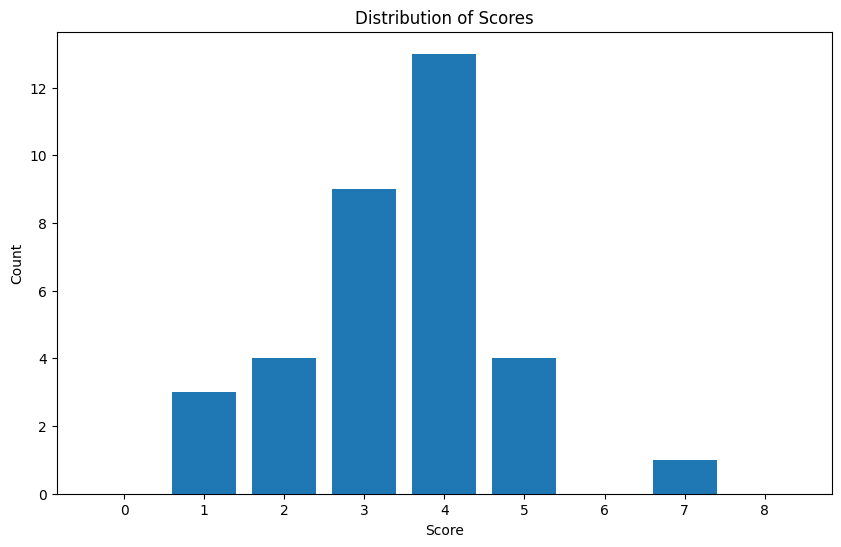

In [30]:

# Fill NaN values with 0 and rename columns


# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(merged_df['score'], merged_df['count'])
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.xticks(range(9))  # Ensure all score values (0-8) are shown on x-axis
plt.show()